# Deeplab

In [1]:
%matplotlib inline
# %load_ext autoreload
# %autoreload 2
from learn import *

In [2]:
sz = 256
num_slice = 25

num_gpus = 2
gpu_start = 4
num_workers = 8
device_ids = range(gpu_start, gpu_start + num_gpus)
torch.cuda.set_device(gpu_start)
bs = 10 * num_gpus

In [3]:
model_name = 'deeplab'

In [4]:
data = None

In [5]:
learn, denorm, data = learner_on_dataset(datapaths[0], bs, device_ids, num_workers, model_name='deeplab',
                                         debug=False, global_dataset=True, data=data, num_slice=num_slice, sz=sz)
(trn_x,trn_y), (val_x,val_y) = data


Data finished loading: data/train/AOI_3_Paris_Train


In [6]:
learn.load('deeplab-paris')
learn.unfreeze()

epoch      trn_loss   val_loss   mask_acc                      
    0      0.12665    0.082844   0.068648  
    1      0.126703   0.08115    0.068648                      
    2      0.126555   0.084731   0.068648                      
    3      0.121601   0.080089   0.068648                      
    4      0.121416   0.078596   0.068648                      
    5      0.127748   0.078854   0.068648                      
    6      0.128481   0.078688   0.068648                      
    8      0.122418   0.083283   0.068648                      
    9      0.123424   0.084707   0.068648                      
    10     0.126365   0.08083    0.068648                      
    11     0.121483   0.078841   0.068648                      
    12     0.123783   0.094697   0.068648                      
    13     0.123646   0.084299   0.068648                      
    14     0.120777   0.087233   0.068648                      
    15     0.123862   0.082531   0.068648                   

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



    24     0.122099   0.079333   0.068648                      
    25     0.114839   0.084266   0.068648                      
    26     0.117928   0.081244   0.068648                      
 35%|███▌      | 354/1004 [08:32<15:41,  1.45s/it, loss=0.115]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



    29     0.122414   0.09732    0.068648                      

CPU times: user 4d 9h 15min 27s, sys: 2d 6h 58min 23s, total: 6d 16h 13min 51s
Wall time: 16h 22min 45s


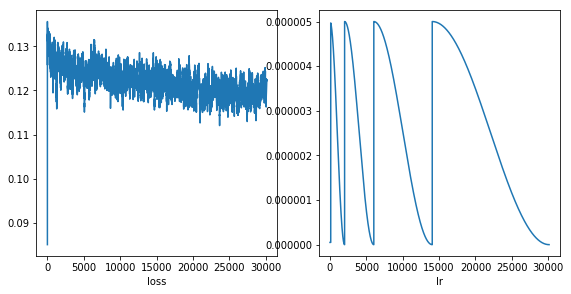

In [7]:
%%time
lr = 1e-5 / 2
lrs = np.array([lr/9, lr])
wd = 0.01
wds = [wd/9, wd]
learn.unfreeze()
train_and_plot(learn, 0, 'deeplab-paris', lrs=lrs, n_cycles=4, wds=wds, use_wd_sched=True,
               cycle_len=2, cycle_mult=2, best_save_name='deeplab-paris')

  2%|▏         | 2/121 [00:06<06:06,  3.08s/it, loss=0.123]  


Exception in thread Thread-6:
Traceback (most recent call last):
  File "/home/twofyw/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/twofyw/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/twofyw/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   mask_acc                    
    0      0.259184   1.64266    0.802396  



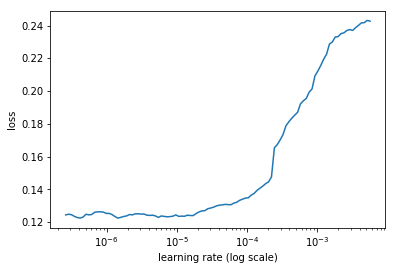

In [8]:
learn.lr_find(1e-7, 1e-2)
learn.sched.plot()